In [1]:

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform_train = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(0.13 , 0.31),
                                      transforms.RandomRotation(30),
                                      transforms.RandomAffine(10 , translate= (0.1 , 0.1))
                                     ])
transform_test = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(0.13 , 0.31)])


dataset_train = torchvision.datasets.MNIST(root="data",
                                           train = True,
                                           download = True,
                                           transform = transform_train)

dataset_test = torchvision.datasets.MNIST(root="data",
                                           train = False,
                                           download = True,
                                           transform = transform_test)



100%|██████████| 9.91M/9.91M [00:06<00:00, 1.53MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 213kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.84MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]


## Test DataSet

torch.Size([1, 28, 28])
1


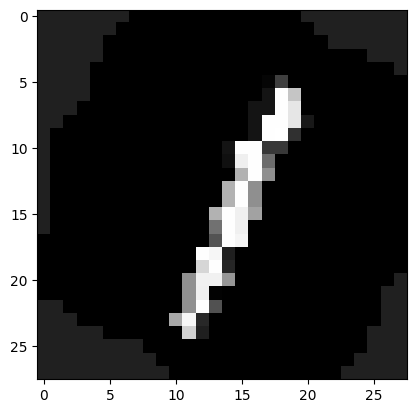

In [7]:
idx = 8
print(dataset_train[idx][0].size())
plt.imshow(dataset_train[idx][0].permute(1,2,0) , cmap="gray")
print(dataset_train[idx][1])

In [8]:
28 * 28

784

## Data Loader

In [9]:
dataloader_train = torch.utils.data.DataLoader(dataset_train , batch_size=64 , shuffle = True , num_workers=2)
dataloader_test = torch.utils.data.DataLoader(dataset_test , batch_size=64 , shuffle = False , num_workers=2)

In [10]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784 , 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512 , 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128 , 10),
)

In [11]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
optimizer = torch.optim.Adam(model.parameters())
loss_function = torch.nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [13]:
from tqdm import tqdm_notebook as tqdm

In [14]:
model(dataset_train[idx][0])

tensor([[-0.0199,  0.1936,  0.0362, -0.0368, -0.1940,  0.0459, -0.1159,  0.0928,
          0.0335, -0.0786]], grad_fn=<AddmmBackward0>)

In [15]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
train_loss = []
train_acc = []
test_acc = []
test_loss = []


for epoch in range(30):
  model.train()
  pbar = tqdm(dataloader_train , desc = f"Training epoch {epoch + 1}")

  sum_correct = 0
  sum_sample = 0
  sum_loss = 0
  for x , y in pbar:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()

    output = model(x)
    loss_value = loss_function(output , y)
    pbar.set_postfix_str(f"Loss = {loss_value:.3f}")
    loss_value.backward()
    optimizer.step()


    sum_correct += (output.argmax(axis = 1) == y).sum().item()
    sum_sample += len(y)
    sum_loss += loss_value * len(y)

  train_loss.append(sum_loss / sum_sample)
  train_acc.append(sum_correct / sum_sample)
  print(f"Average train loss: {sum_loss / sum_sample:.4f}")
  print(f"Average train Accuracy: {sum_correct / sum_sample:.4f}")
  print("--------------------------------")

  pbar = tqdm(dataloader_test , desc  = f"Testing in epoch {epoch + 1}" )

  for x , y in pbar:
    model.eval()
    x = x.to(device)
    y = y.to(device)

    with torch.no_grad():
        output = model(x)
        loss_value = loss_function(output , y)
        pbar.set_postfix_str(f"Loss = {loss_value:.3f}")
        sum_sample += len(y)
        sum_loss += loss_value.item() * len(y)
        sum_correct += (y == output.argmax(axis = 1)).sum().item()

  test_loss.append((sum_loss / sum_sample))
  test_acc.append((sum_correct/sum_sample))
  print(f"Average test loss: {sum_loss / sum_sample :.4f}")
  print(f"Average test Accuracy: {sum_correct / sum_sample:.4f}")
  print("--------------------------------")



C:\Users\D\AppData\Local\Temp\ipykernel_11248\3333405902.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(dataloader_train , desc = f"Training epoch {epoch + 1}")


Training epoch 1:   0%|          | 0/938 [00:00<?, ?it/s]

Average train loss: 0.5134
Average train Accuracy: 0.8347
--------------------------------


C:\Users\D\AppData\Local\Temp\ipykernel_11248\3333405902.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(dataloader_test , desc  = f"Testing in epoch {epoch + 1}" )


Testing in epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Average test loss: 0.4630
Average test Accuracy: 0.8511
--------------------------------


Training epoch 2:   0%|          | 0/938 [00:00<?, ?it/s]

Average train loss: 0.2543
Average train Accuracy: 0.9199
--------------------------------


Testing in epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Average test loss: 0.2326
Average test Accuracy: 0.9268
--------------------------------


Training epoch 3:   0%|          | 0/938 [00:00<?, ?it/s]

Average train loss: 0.2049
Average train Accuracy: 0.9355
--------------------------------


Testing in epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Average test loss: 0.1888
Average test Accuracy: 0.9404
--------------------------------


Training epoch 4:   0%|          | 0/938 [00:00<?, ?it/s]

Average train loss: 0.1842
Average train Accuracy: 0.9418
--------------------------------


Testing in epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Average test loss: 0.1701
Average test Accuracy: 0.9463
--------------------------------


Training epoch 5:   0%|          | 0/938 [00:00<?, ?it/s]

Average train loss: 0.1677
Average train Accuracy: 0.9469
--------------------------------


Testing in epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

Average test loss: 0.1550
Average test Accuracy: 0.9509
--------------------------------


Training epoch 6:   0%|          | 0/938 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [17]:
train_loss

[tensor(0.5134, grad_fn=<DivBackward0>),
 tensor(0.2543, grad_fn=<DivBackward0>),
 tensor(0.2049, grad_fn=<DivBackward0>),
 tensor(0.1842, grad_fn=<DivBackward0>),
 tensor(0.1677, grad_fn=<DivBackward0>)]

In [18]:
test_loss = list(map(lambda x:x.item() , test_loss))
train_loss = list(map(lambda x:x.item() , train_loss))

Text(0, 0.5, 'Epoch')

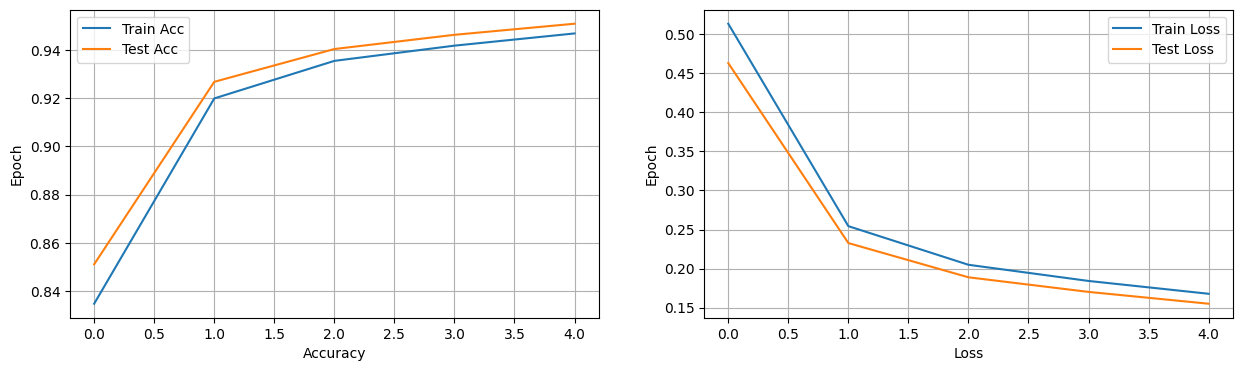

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(train_acc , label = "Train Acc")
plt.plot(test_acc , label = "Test Acc")
plt.grid()
plt.legend()
plt.xlabel("Accuracy")
plt.ylabel("Epoch")

plt.subplot(1,2,2)
plt.plot(train_loss , label = "Train Loss")
plt.plot(test_loss , label = "Test Loss")
plt.grid()
plt.legend()
plt.xlabel("Loss")
plt.ylabel("Epoch")

